<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 22 Lab</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1

We'd like to analyze the `SNAP_history_1969_2019.csv` dataset, however it's missing some data. Find the missing values. Fix incorrect entries as well.

Some helpful formulas:

$ \texttt{Total Costs} = \texttt{Total Benefits} + \texttt{Other Costs} $

$ \texttt{Total Benefits} = \texttt{Total Costs} - \texttt{Other Costs} $

$ \texttt{Other Costs} = \texttt{Total Costs} - \texttt{Total Benefits} $

$ \texttt{Average Participation} = \frac{\texttt{Total Benefits}}{\texttt{Average Benefits Per Person}}$

$ \texttt{Average Benefits Per Person} = \frac{\texttt{Total Benefits}}{\texttt{Average Participation}}$

$ \texttt{Total Benefits} = \texttt{Average Benefits Per Person} * \texttt{Average Participation}$

Note: `Average Participation` is in the thousands and all costs  are in the millions.

Hint: Think about how we can filter for specific columns that are null and apply a fix for those missing values.


In [33]:
# calling it s_df to not confuse it with the others 
# and because `snap_df` is too much to constantly write
s_df = pd.read_csv('SNAP_history_1969_2019.csv')

In [34]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 50 non-null     object 
 1   Average Participation       48 non-null     float64
 2   Average Benefit Per Person  48 non-null     float64
 3   Total Benefits(M)           50 non-null     float64
 4   Other Costs                 51 non-null     float64
 5   Total Costs(M)              48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [35]:
s_df[s_df.isnull().any(axis=1)]

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
3,1972,NaN,13.48,1797.30,69.40,NaN
7,1976,18549.0,NaN,5326.50,359.00,5685.50
16,1985,19899.0,NaN,10743.60,959.60,11703.20
19,1988,18645.0,49.83,11149.10,1167.70,NaN
22,1991,NaN,63.78,17315.77,1431.50,18747.27
24,NaN,26987.0,67.95,22006.03,1646.94,23652.97
33,2002,19096.0,79.67,NaN,2380.82,20637.02
36,2005,25628.0,92.89,28567.88,2504.13,NaN
38,2007,26316.0,NaN,30373.27,2800.25,33173.52
45,2014,NaN,125.01,69998.84,4061.49,74060.33


Step 1: Populate the missing valuess using the fillna built-in function and the predifined relations (equations) between the columns

In [36]:
s_df["Total Benefits(M)"] = s_df["Total Benefits(M)"].fillna((s_df["Total Costs(M)"] - s_df["Other Costs"]))

In [37]:
s_df["Total Costs(M)"] = s_df["Total Costs(M)"].fillna((s_df["Total Benefits(M)"] + s_df["Other Costs"]))

Note: I spoke with Malcolm and he said the formulas for Average Benefit Per Person and Average Participation are not correct but to still use them to populate the missing values for these two columns

In [38]:
#Multiply Total benefits * 1000 to convert millions into thousands between doing the division. Round off to two places
#to keep consistency with the values already in that column
s_df["Average Benefit Per Person"] = s_df["Average Benefit Per Person"].fillna(((s_df["Total Benefits(M)"] * 1000) / s_df["Average Participation"]).round(2))

In [39]:
s_df["Average Participation"] = s_df["Average Participation"].fillna(((s_df["Total Benefits(M)"] * 1000) / s_df["Average Benefit Per Person"]).round(1))

In [55]:
#Creating the correct Fiscal Year, dropping the incorrect one and renaming+rearranging columns to have the same
#arrangement from the beginning.
s_df["New Fiscal Year"] = range(1969, 1969+len(s_df))

In [59]:
s_df.drop("Fiscal Year", axis=1, inplace=True)

In [66]:
s_df.rename(columns={"New Fiscal Year": "Fiscal Year"},inplace=True)

In [71]:
s_df = s_df.reindex(["Fiscal Year",
             "Average Participation",
             "Average Benefit Per Person",
             "Total Benefits(M)",
             "Other Costs",
             "Total Costs(M)"], axis=1)

In [74]:
s_df.head()

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.8,21.7,250.5
1,1970,4340.0,10.55,549.7,27.2,576.9
2,1971,9368.0,13.55,1522.7,53.2,1575.9
3,1972,133330.9,13.48,1797.3,69.4,1866.7
4,1973,12166.0,14.60,2131.4,76.0,2207.4


In [73]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 51 non-null     int64  
 1   Average Participation       51 non-null     float64
 2   Average Benefit Per Person  51 non-null     float64
 3   Total Benefits(M)           51 non-null     float64
 4   Other Costs                 51 non-null     float64
 5   Total Costs(M)              51 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.5 KB


# Exercise 2

We'd like to do some analysis on our `grades.csv` dataset.

Using the following dataframe, do some exploratory analysis and then plot, at least, one chart using matplotlib or seaborn (with title, axes labeled and anything else that would make it look professional).

Hint: 
We've seen how to plot box plots, scatter plots, line charts, bar charts, histograms and even more complicated charts like heatmaps of the correlations. Refer to your notes and try to come up with a useful chart that demonstrates a relationship we might like to explore.


In [78]:
# calling it g_df to not confuse it with the others 
# and because `grades_df` is too much to constantly write
g_df = pd.read_csv('grades.csv')

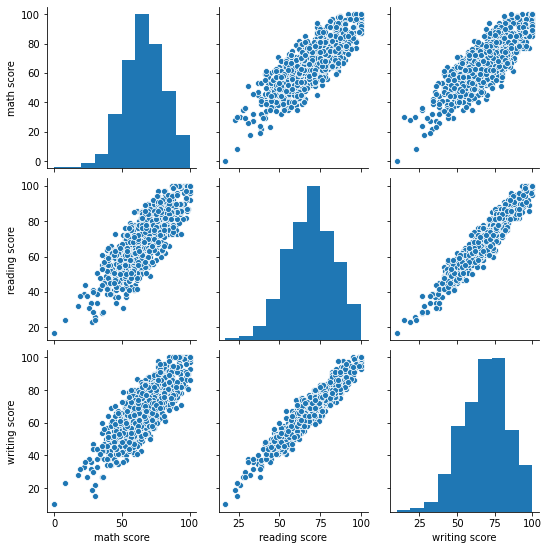

In [76]:
sns.pairplot(g_df)

In [79]:
g_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


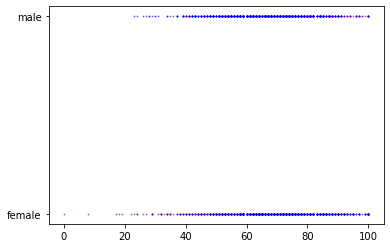

In [87]:
plt.scatter(x="math score", y = "gender", data= g_df, c="purple", s=0.75, alpha=0.5, label= "Math Score")

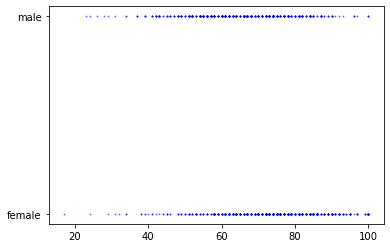

In [88]:
plt.scatter(x="reading score", y="gender", data= g_df, c= "blue", s = 0.75, alpha=0.5, label= "Reading Score")

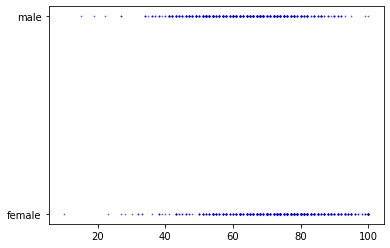

In [89]:
plt.scatter(x="writing score", y="gender", data= g_df, c= "blue", s = 0.75, alpha=0.5, label= "Reading Score")

# Exercise 3

Exercise 3 was a logistic regression on the Titanic dataset. It will be given as a guided project instead.